<a href="https://colab.research.google.com/github/HafsaZahran1/DSS_Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factory Workers’ Daily Performance & Attrition

# ML

### My Attempt is Classifing the `Termination` event based on the frequency of the events and mean of his/her efficacy

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
# Set visualization style
sns.set(style="whitegrid")


In [130]:
df = pd.read_csv('wfs_behaviors_and_records_508p-546d-98r_20220722173739.csv', encoding='latin-1')

In [131]:
df_grouped = df.groupby(['sub_fname', 'sub_lname'])['record_comptype'].unique().reset_index()

In [132]:
df_grouped.iloc[0]

sub_fname                                                       Adam
sub_lname                                                      Lewis
record_comptype    [Presence, Efficacy, Sacrifice, Teamwork, Feat...
Name: 0, dtype: object

In [133]:
df_subname=df[df['sub_fname']=='Mary'  ]
df_subname = df_subname[df_subname['sub_lname']=='Yoshida'  ]
df_subname = df_subname[df_subname['record_comptype']=='Efficacy'  ]
df_effic_test=df_subname['actual_efficacy_h']
df_effic_test.astype(float).mean()

0.29116666666666663

In [134]:
df_grouped.shape[0]

668

In [135]:
events=df['record_comptype'].unique()
events

array(['Presence', 'Efficacy', 'Feat', 'Slip', 'Sacrifice', 'Lapse',
       'Idea', 'Teamwork', 'Absence', 'Disruption', 'None', 'Resignation',
       'Termination', 'Onboarding', 'Sabotage'], dtype=object)

In [136]:
non_record=df[df['record_comptype']=='None']
non_record.iloc[0]['actual_efficacy_h']

'None'

#### lets now create Some new data set that represents the frequeny of each meaningful event except for the efficacy it has the average of the total efficacy records

First : I have to get all the workers by grouping data set on the first and second name

Second : Iterating over those workers and getting the frequency of the events related to them

In [137]:
new_df = pd.DataFrame(columns=['Presence', 'Efficacy','Feat', 'Slip','Sacrifice','Lapse', 'Idea', 'Teamwork','Absence', 'Disruption','Sabotage','Termination'])

In [138]:
new_df

,Presence,Efficacy,Feat,Slip,Sacrifice,Lapse,Idea,Teamwork,Absence,Disruption,Sabotage,Termination


In [139]:
# This function used to return the frequency of an event for a given fname,lname,type(event) except for Efficacy (event) it return the mean


def get_frequency(fname,lname,type):
    df_subname=df[df['sub_fname']==fname  ]
    df_subname = df_subname[df_subname['sub_lname']==lname  ]
    df_subname = df_subname[df_subname['record_comptype']==type  ]
    if type == 'Efficacy':  ## here I check if the event is `Efficacy` so it returns the average
        df_effic=df_subname['actual_efficacy_h']
        return df_effic.astype(float).mean()
    else:
        return df_subname.shape[0]


In [140]:
df_grouped.iloc[0]['sub_fname']

'Adam'

#### Iterating over those workers and getting the frequency of the events related to them then loading the new data set

In [141]:
for i in range(df_grouped.shape[0]):

    Presence=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Presence')
    Efficacy=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Efficacy')
    Feat=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Feat')
    Slip=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Slip')
    Sacrifice=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Sacrifice')
    Lapse=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Lapse')
    Idea=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Idea')
    Teamwork=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Teamwork')
    Absence=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Absence')
    Disruption=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Disruption')
    Sabotage=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Sabotage')
    Termination=get_frequency(df_grouped.iloc[i]['sub_fname'],df_grouped.iloc[i]['sub_lname'],'Termination')
    print(i)
    new_row={
        'Presence': Presence,
        'Efficacy': Efficacy,
        'Feat': Feat,
        'Slip': Slip,
        'Sacrifice': Sacrifice,
        'Lapse': Lapse,
        'Idea': Idea,
        'Teamwork': Teamwork,
        'Absence': Absence,
        'Disruption': Disruption,
        'Sabotage': Sabotage,
        'Termination': Termination,
              }
    new_df=new_df.append(new_row, ignore_index=True)


0


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


1


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


2


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


3


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


4


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


5


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


6


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


7


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


8


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


9


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


10


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


11


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


12


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


13


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


14


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


15


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


16


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


17


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


18


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


19


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


20


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


21


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


22


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


23


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


24


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


25


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


26


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


27


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


28


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


29


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


30


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


31


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


32


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


33


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


34


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


35


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


36


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


37


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


38


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


39


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


40


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


41


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


42


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


43


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


44


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


45


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


46


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


47


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


48


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


49


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


50


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


51


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


52


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


53


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


54


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


55


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


56


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


57


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


58


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


59


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


60


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


61


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


62


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


63


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


64


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


65


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


66


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


67


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


68


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


69


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


70


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


71


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


72


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


73


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


74


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


75


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


76


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


77


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


78


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


79


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


80


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


81


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


82


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


83


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


84


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


85


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


86


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


87


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


88


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


89


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


90


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


91


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


92


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


93


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


94


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


95


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


96


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


97


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


98


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


99


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


100


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


101


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


102


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


103


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


104


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


105


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


106


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


107


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


108


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


109


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


110


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


111


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


112


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


113


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


114


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


115


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


116


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


117


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


118


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


119


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


120


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


121


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


122


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


123


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


124


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


125


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


126


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


127


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


128


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


129


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


130


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


131


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


132


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


133


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


134


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


135


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


136


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


137


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


138


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


139


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


140


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


141


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


142


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


143


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


144


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


145


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


146


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


147


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


148


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


149


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


150


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


151


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


152


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


153


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


154


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


155


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


156


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


157


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


158


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


159


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


160


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


161


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


162


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


163


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


164


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


165


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


166


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


167


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


168


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


169


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


170


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


171


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


172


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


173


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


174


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


175


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


176


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


177


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


178


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


179


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


180


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


181


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


182


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


183


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


184


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


185


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


186


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


187


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


188


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


189


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


190


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


191


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


192


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


193


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


194


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


195


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


196


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


197


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


198


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


199


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


200


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


201


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


202


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


203


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


204


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


205


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


206


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


207


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


208


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


209


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


210


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


211


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


212


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


213


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


214


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


215


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


216


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


217


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


218


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


219


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


220


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


221


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


222


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


223


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


224


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


225


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


226


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


227


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


228


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


229


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


230


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


231


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


232


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


233


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


234


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


235


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


236


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


237


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


238


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


239


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


240


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


241


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


242


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


243


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


244


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


245


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


246


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


247


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


248


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


249


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


250


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


251


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


252


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


253


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


254


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


255


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


256


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


257


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


258


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


259


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


260


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


261


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


262


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


263


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


264


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


265


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


266


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


267


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


268


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


269


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


270


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


271


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


272


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


273


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


274


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


275


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


276


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


277


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


278


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


279


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


280


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


281


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


282


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


283


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


284


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


285


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


286


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


287


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


288


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


289


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


290


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


291


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


292


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


293


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


294


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


295


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


296


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


297


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


298


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


299


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


300


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


301


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


302


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


303


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


304


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


305


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


306


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


307


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


308


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


309


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


310


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


311


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


312


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


313


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


314


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


315


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


316


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


317


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


318


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


319


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


320


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


321


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


322


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


323


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


324


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


325


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


326


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


327


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


328


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


329


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


330


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


331


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


332


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


333


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


334


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


335


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


336


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


337


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


338


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


339


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


340


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


341


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


342


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


343


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


344


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


345


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


346


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


347


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


348


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


349


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


350


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


351


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


352


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


353


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


354


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


355


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


356


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


357


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


358


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


359


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


360


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


361


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


362


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


363


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


364


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


365


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


366


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


367


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


368


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


369


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


370


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


371


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


372


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


373


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


374


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


375


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


376


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


377


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


378


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


379


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


380


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


381


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


382


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


383


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


384


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


385


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


386


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


387


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


388


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


389


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


390


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


391


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


392


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


393


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


394


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


395


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


396


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


397


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


398


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


399


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


400


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


401


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


402


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


403


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


404


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


405


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


406


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


407


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


408


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


409


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


410


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


411


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


412


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


413


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


414


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


415


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


416


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


417


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


418


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


419


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


420


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


421


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


422


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


423


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


424


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


425


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


426


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


427


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


428


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


429


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


430


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


431


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


432


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


433


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


434


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


435


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


436


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


437


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


438


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


439


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


440


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


441


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


442


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


443


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


444


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


445


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


446


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


447


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


448


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


449


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


450


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


451


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


452


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


453


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


454


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


455


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


456


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


457


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


458


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


459


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


460


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


461


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


462


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


463


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


464


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


465


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


466


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


467


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


468


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


469


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


470


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


471


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


472


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


473


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


474


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


475


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


476


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


477


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


478


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


479


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


480


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


481


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


482


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


483


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


484


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


485


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


486


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


487


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


488


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


489


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


490


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


491


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


492


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


493


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


494


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


495


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


496


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


497


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


498


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


499


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


500


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


501


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


502


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


503


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


504


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


505


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


506


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


507


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


508


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


509


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


510


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


511


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


512


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


513


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


514


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


515


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


516


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


517


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


518


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


519


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


520


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


521


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


522


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


523


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


524


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


525


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


526


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


527


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


528


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


529


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


530


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


531


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


532


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


533


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


534


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


535


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


536


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


537


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


538


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


539


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


540


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


541


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


542


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


543


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


544


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


545


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


546


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


547


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


548


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


549


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


550


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


551


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


552


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


553


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


554


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


555


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


556


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


557


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


558


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


559


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


560


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


561


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


562


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


563


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


564


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


565


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


566


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


567


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


568


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


569


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


570


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


571


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


572


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


573


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


574


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


575


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


576


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


577


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


578


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


579


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


580


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


581


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


582


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


583


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


584


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


585


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


586


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


587


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


588


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


589


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


590


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


591


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


592


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


593


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


594


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


595


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


596


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


597


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


598


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


599


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


600


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


601


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


602


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


603


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


604


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


605


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


606


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


607


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


608


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


609


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


610


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


611


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


612


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


613


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


614


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


615


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


616


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


617


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


618


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


619


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


620


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


621


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


622


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


623


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


624


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


625


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


626


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


627


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


628


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


629


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


630


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


631


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


632


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


633


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


634


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


635


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


636


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


637


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


638


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


639


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


640


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


641


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


642


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


643


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


644


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


645


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


646


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


647


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


648


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


649


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


650


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


651


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


652


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


653


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


654


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


655


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


656


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


657


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


658


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


659


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


660


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


661


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


662


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


663


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


664


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


665


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


666


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


667


<ipython-input-141-d18f08f00d5c>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df=new_df.append(new_row, ignore_index=True)


#### Now the new data set represents the frequency of each event in the records, Efficacy represents the mean (average) of total efficacies values

In [142]:
new_df.isnull().sum()

Presence       0
Efficacy       1
Feat           0
Slip           0
Sacrifice      0
Lapse          0
Idea           0
Teamwork       0
Absence        0
Disruption     0
Sabotage       0
Termination    0
dtype: int64

In [143]:
new_df

,Presence,Efficacy,Feat,Slip,Sacrifice,Lapse,Idea,Teamwork,Absence,Disruption,Sabotage,Termination
0,379.0,1.020148,7.0,2.0,13.0,3.0,10.0,8.0,11.0,0.0,0.0,0.0
1,382.0,0.530929,5.0,2.0,8.0,1.0,18.0,11.0,8.0,2.0,1.0,0.0
2,55.0,0.994436,0.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3,379.0,0.528583,7.0,2.0,8.0,4.0,3.0,12.0,11.0,0.0,0.0,0.0
4,378.0,0.803516,8.0,2.0,8.0,2.0,3.0,11.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
663,377.0,0.688523,10.0,3.0,8.0,2.0,12.0,10.0,14.0,1.0,2.0,0.0
664,377.0,0.528942,7.0,1.0,1.0,1.0,12.0,9.0,13.0,6.0,1.0,0.0
665,305.0,0.526036,6.0,0.0,7.0,1.0,4.0,7.0,6.0,0.0,1.0,0.0
666,123.0,0.622130,2.0,2.0,1.0,0.0,5.0,2.0,6.0,4.0,0.0,0.0


In [144]:
new_df=new_df.dropna()

In [145]:
new_df.isnull().sum()

Presence       0
Efficacy       0
Feat           0
Slip           0
Sacrifice      0
Lapse          0
Idea           0
Teamwork       0
Absence        0
Disruption     0
Sabotage       0
Termination    0
dtype: int64

In [146]:
new_df[new_df['Termination']==1]

,Presence,Efficacy,Feat,Slip,Sacrifice,Lapse,Idea,Teamwork,Absence,Disruption,Sabotage,Termination
2,55.0,0.994436,0.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
7,137.0,0.695161,2.0,4.0,5.0,1.0,4.0,4.0,1.0,0.0,0.0,1.0
11,300.0,0.966197,6.0,4.0,6.0,4.0,4.0,6.0,12.0,3.0,0.0,1.0
20,107.0,0.601598,2.0,4.0,1.0,1.0,1.0,2.0,8.0,2.0,0.0,1.0
35,252.0,0.358905,7.0,0.0,1.0,3.0,5.0,6.0,9.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
638,27.0,0.798481,1.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0
644,57.0,0.309860,2.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0
645,62.0,0.962661,2.0,0.0,0.0,3.0,1.0,3.0,3.0,0.0,0.0,1.0
650,82.0,0.769293,1.0,3.0,1.0,0.0,3.0,2.0,4.0,0.0,0.0,1.0


#### lets prepare the data for prediction

In [147]:
y=new_df['Termination']
X = new_df.drop(['Termination'], axis=1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, stratify=y , test_size=0.30,  shuffle=True)

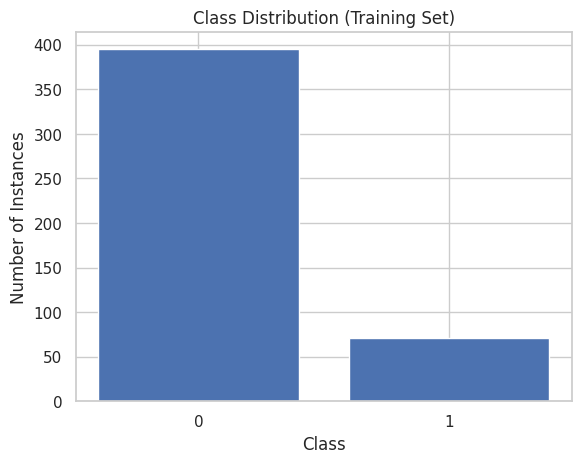

Class Ratios (Training Set): [0.84763948 0.15236052]


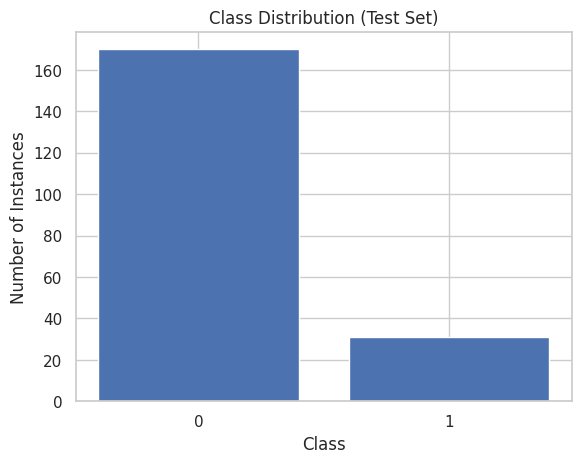

Class Ratios (Test Set): [0.84577114 0.15422886]


In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'Termination' is binary (0 or 1)
# Replace this with your actual dataset


# Calculate class distribution in the training set
class_counts_train = np.bincount(y_train)
num_classes_train = len(class_counts_train)

# Plot bar chart for the training set
plt.bar(range(num_classes_train), class_counts_train, tick_label=range(num_classes_train))
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (Training Set)')
plt.show()

# Calculate class ratios for the training set
class_ratios_train = class_counts_train / len(y_train)
print("Class Ratios (Training Set):", class_ratios_train)

# Similarly, you can perform the same analysis for the test set
class_counts_test = np.bincount(y_test)
num_classes_test = len(class_counts_test)

# Plot bar chart for the test set
plt.bar(range(num_classes_test), class_counts_test, tick_label=range(num_classes_test))
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (Test Set)')
plt.show()

# Calculate class ratios for the test set
class_ratios_test = class_counts_test / len(y_test)
print("Class Ratios (Test Set):", class_ratios_test)


# Resampling

In [150]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

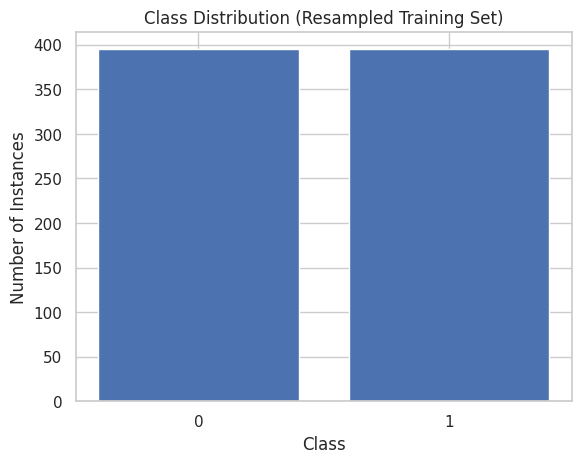

In [151]:


# Calculate class distribution in the resampled training set
class_counts_resampled = np.bincount(y_resampled)
num_classes_resampled = len(class_counts_resampled)

# Plot bar chart for the resampled training set
plt.bar(range(num_classes_resampled), class_counts_resampled, tick_label=range(num_classes_resampled))
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution (Resampled Training Set)')
plt.show()


KNeighborsClassifier - Training Accuracy: 0.8861, Testing Accuracy: 0.7811


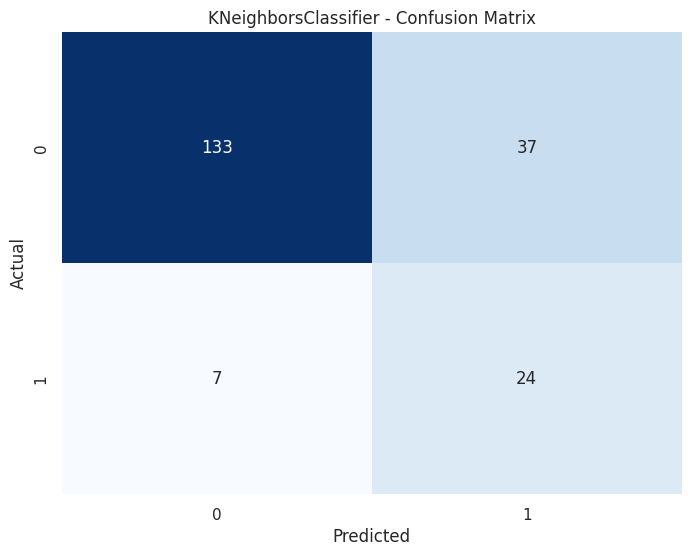

KNeighborsClassifier - Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       170
         1.0       0.39      0.77      0.52        31

    accuracy                           0.78       201
   macro avg       0.67      0.78      0.69       201
weighted avg       0.86      0.78      0.81       201

----------------------------------------
SVC - Training Accuracy: 0.8190, Testing Accuracy: 0.8010


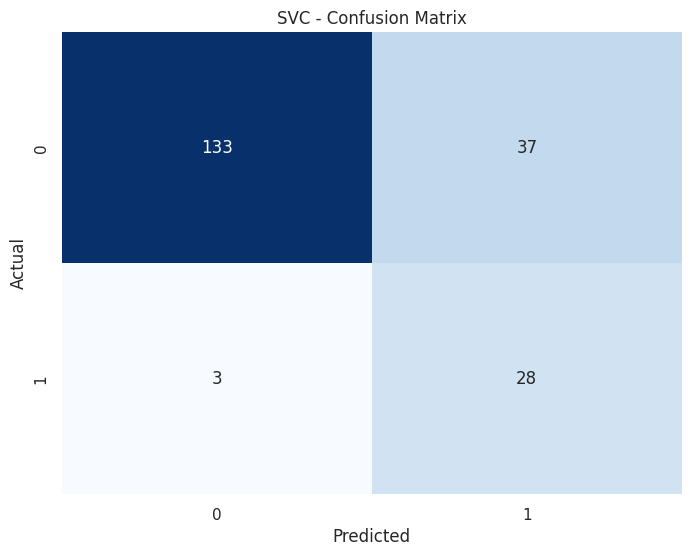

SVC - Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       170
         1.0       0.43      0.90      0.58        31

    accuracy                           0.80       201
   macro avg       0.70      0.84      0.73       201
weighted avg       0.89      0.80      0.83       201

----------------------------------------
RandomForestClassifier - Training Accuracy: 1.0000, Testing Accuracy: 0.8806


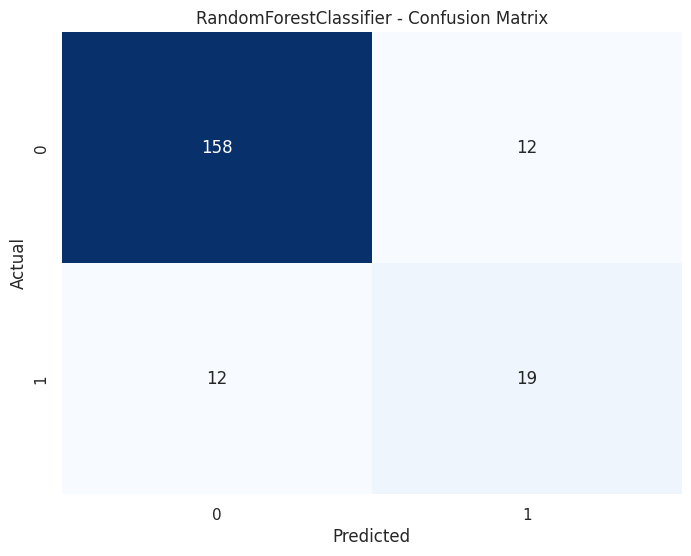

RandomForestClassifier - Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       170
         1.0       0.61      0.61      0.61        31

    accuracy                           0.88       201
   macro avg       0.77      0.77      0.77       201
weighted avg       0.88      0.88      0.88       201

----------------------------------------
GradientBoostingClassifier - Training Accuracy: 1.0000, Testing Accuracy: 0.8905


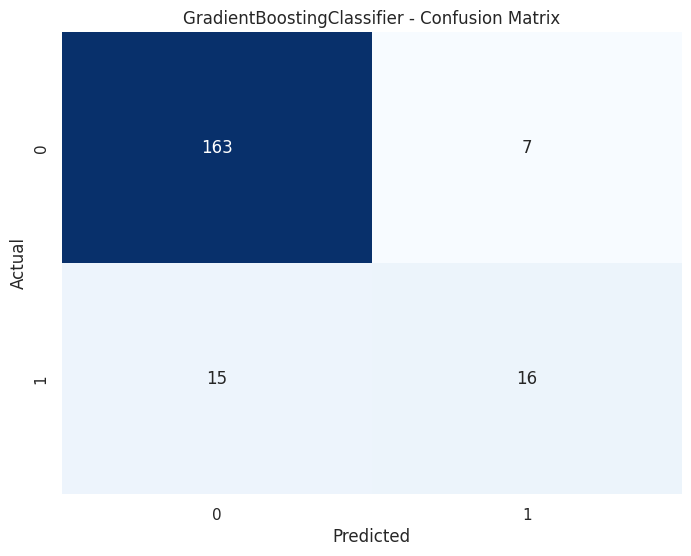

GradientBoostingClassifier - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       170
         1.0       0.70      0.52      0.59        31

    accuracy                           0.89       201
   macro avg       0.81      0.74      0.76       201
weighted avg       0.88      0.89      0.88       201

----------------------------------------
XGBClassifier - Training Accuracy: 1.0000, Testing Accuracy: 0.8806


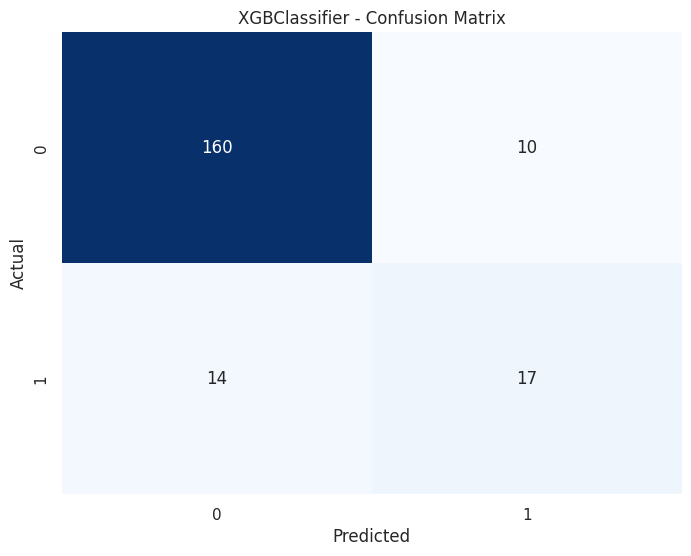

XGBClassifier - Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       170
         1.0       0.63      0.55      0.59        31

    accuracy                           0.88       201
   macro avg       0.77      0.74      0.76       201
weighted avg       0.87      0.88      0.88       201

----------------------------------------


In [152]:

classifiers = [KNeighborsClassifier(n_neighbors=5), SVC(kernel='linear'), RandomForestClassifier(n_estimators=100, random_state=42),
              GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42),
              XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=42)]

train_accuracies = []
test_accuracies = []

for clf in classifiers:
    clf.fit(X_resampled, y_resampled)
    y_pred_train = clf.predict(X_resampled)
    y_pred_test = clf.predict(X_test)

    train_accuracy = accuracy_score(y_resampled, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'{clf.__class__.__name__} - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{clf.__class__.__name__} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

  # Generate classification report
    report = classification_report(y_test, y_pred_test)
    print(f'{clf.__class__.__name__} - Classification Report:\n{report}\n{"-"*40}')


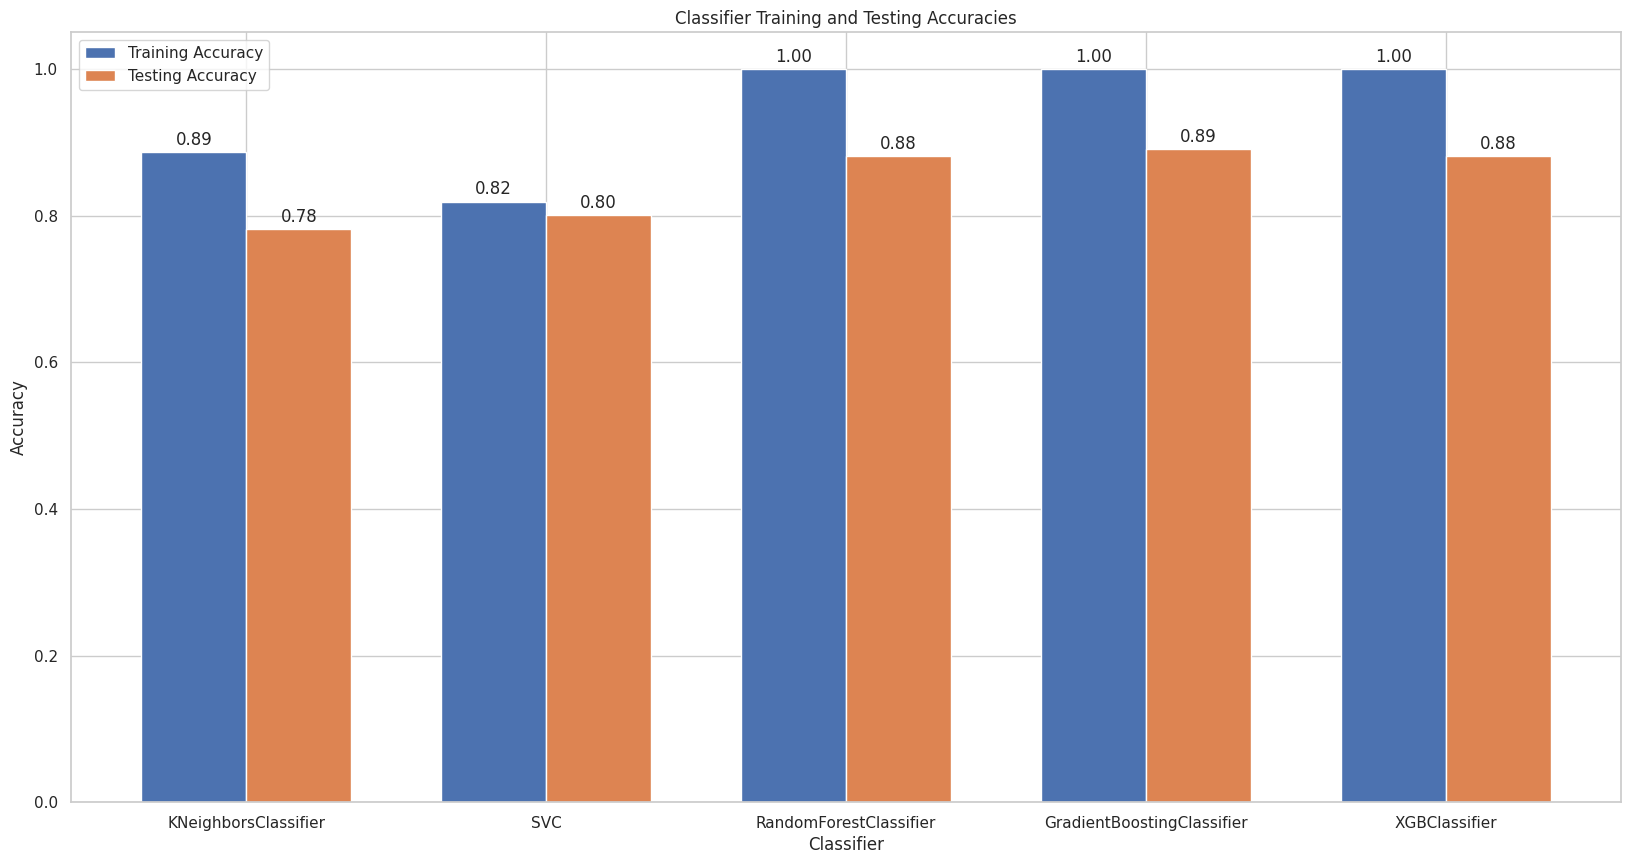

In [153]:
# Plotting the accuracies as a bar chart with labels
plt.figure(figsize=(20, 10))
bar_width = 0.35
bar_positions_train = range(len(classifiers))
bar_positions_test = [pos + bar_width for pos in bar_positions_train]

plt.bar(bar_positions_train, train_accuracies, label='Training Accuracy', width=bar_width)
plt.bar(bar_positions_test, test_accuracies, label='Testing Accuracy', width=bar_width)

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Training and Testing Accuracies')
plt.xticks([pos + bar_width/2 for pos in bar_positions_train], [clf.__class__.__name__ for clf in classifiers])

# Adding labels to the bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(bar_positions_train[i], train_acc + 0.01, f'{train_acc:.2f}', ha='center')
    plt.text(bar_positions_test[i], test_acc + 0.01, f'{test_acc:.2f}', ha='center')

plt.legend()
plt.show()

# cross validation

KNeighborsClassifier - Training Accuracy: 0.9118, Test Accuracy: 0.9179


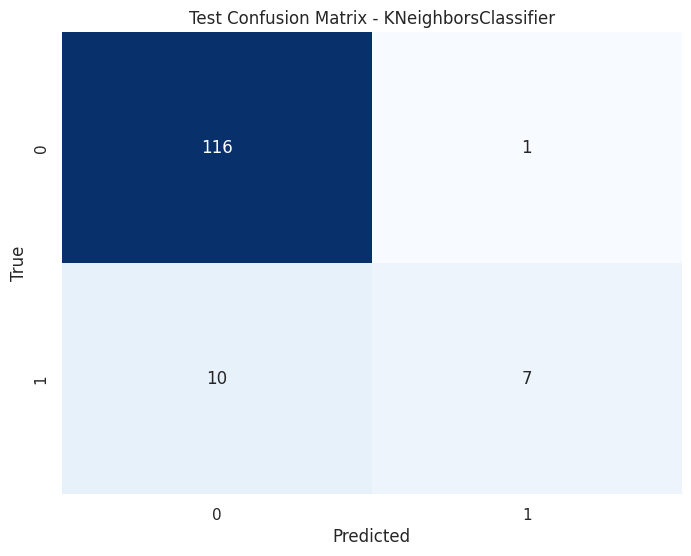

KNeighborsClassifier - Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       117
         1.0       0.88      0.41      0.56        17

    accuracy                           0.92       134
   macro avg       0.90      0.70      0.76       134
weighted avg       0.91      0.92      0.90       134

----------------------------------------
SVC - Training Accuracy: 0.9268, Test Accuracy: 0.9104


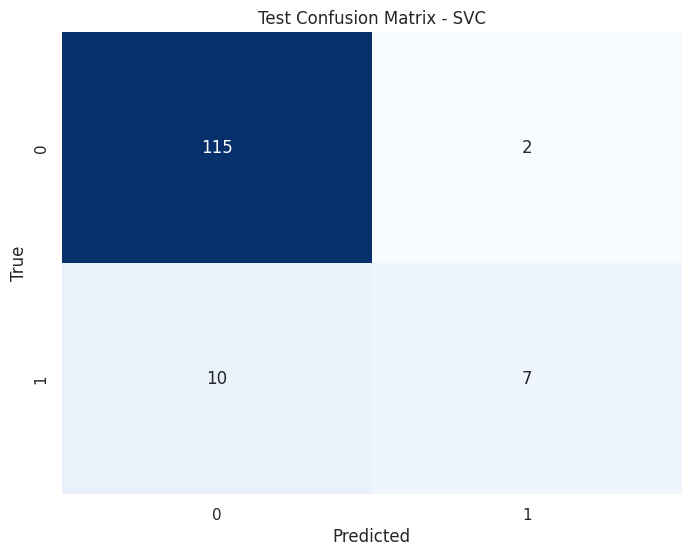

SVC - Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       117
         1.0       0.78      0.41      0.54        17

    accuracy                           0.91       134
   macro avg       0.85      0.70      0.74       134
weighted avg       0.90      0.91      0.90       134

----------------------------------------
RandomForestClassifier - Training Accuracy: 1.0000, Test Accuracy: 0.9179


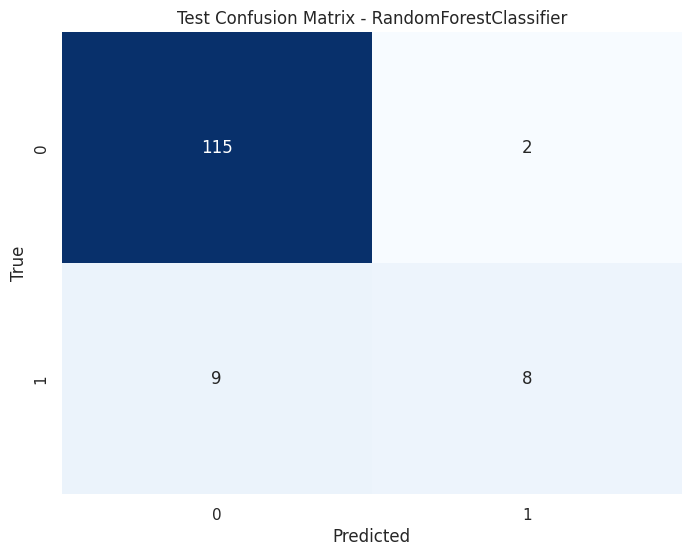

RandomForestClassifier - Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       117
         1.0       0.80      0.47      0.59        17

    accuracy                           0.92       134
   macro avg       0.86      0.73      0.77       134
weighted avg       0.91      0.92      0.91       134

----------------------------------------
GradientBoostingClassifier - Training Accuracy: 0.9850, Test Accuracy: 0.9254


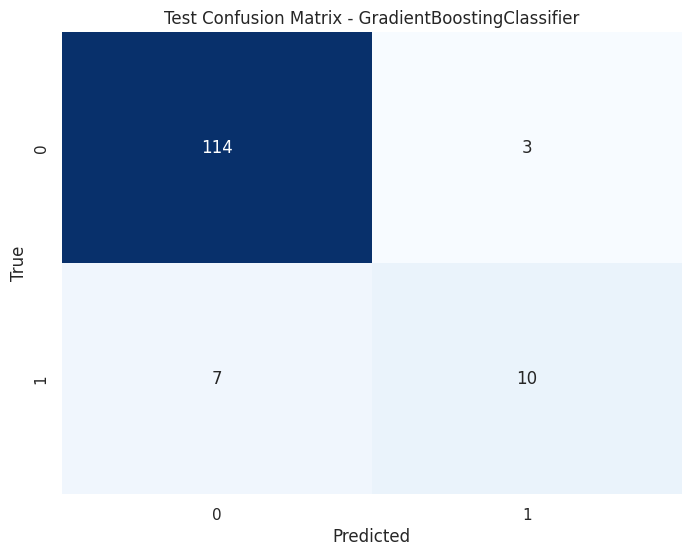

GradientBoostingClassifier - Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       117
         1.0       0.77      0.59      0.67        17

    accuracy                           0.93       134
   macro avg       0.86      0.78      0.81       134
weighted avg       0.92      0.93      0.92       134

----------------------------------------
XGBClassifier - Training Accuracy: 0.9981, Test Accuracy: 0.9179


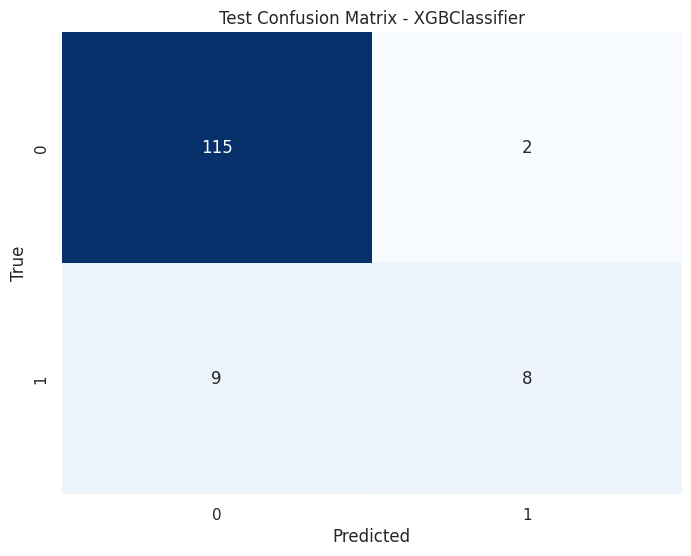

XGBClassifier - Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       117
         1.0       0.80      0.47      0.59        17

    accuracy                           0.92       134
   macro avg       0.86      0.73      0.77       134
weighted avg       0.91      0.92      0.91       134

----------------------------------------


In [154]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}

# Store accuracies for plotting
train_accuracies = []
test_accuracies = []

# Iterate through classifiers
for clf_name, clf in classifiers.items():
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Calculate training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Print accuracy for both training and test sets
    print(f'{clf_name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    # Plot confusion matrix for test set
    conf_mat_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Test Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print classification report for test set
    report_test = classification_report(y_test, y_test_pred)
    print(f'{clf_name} - Test Classification Report:\n{report_test}\n{"-"*40}')

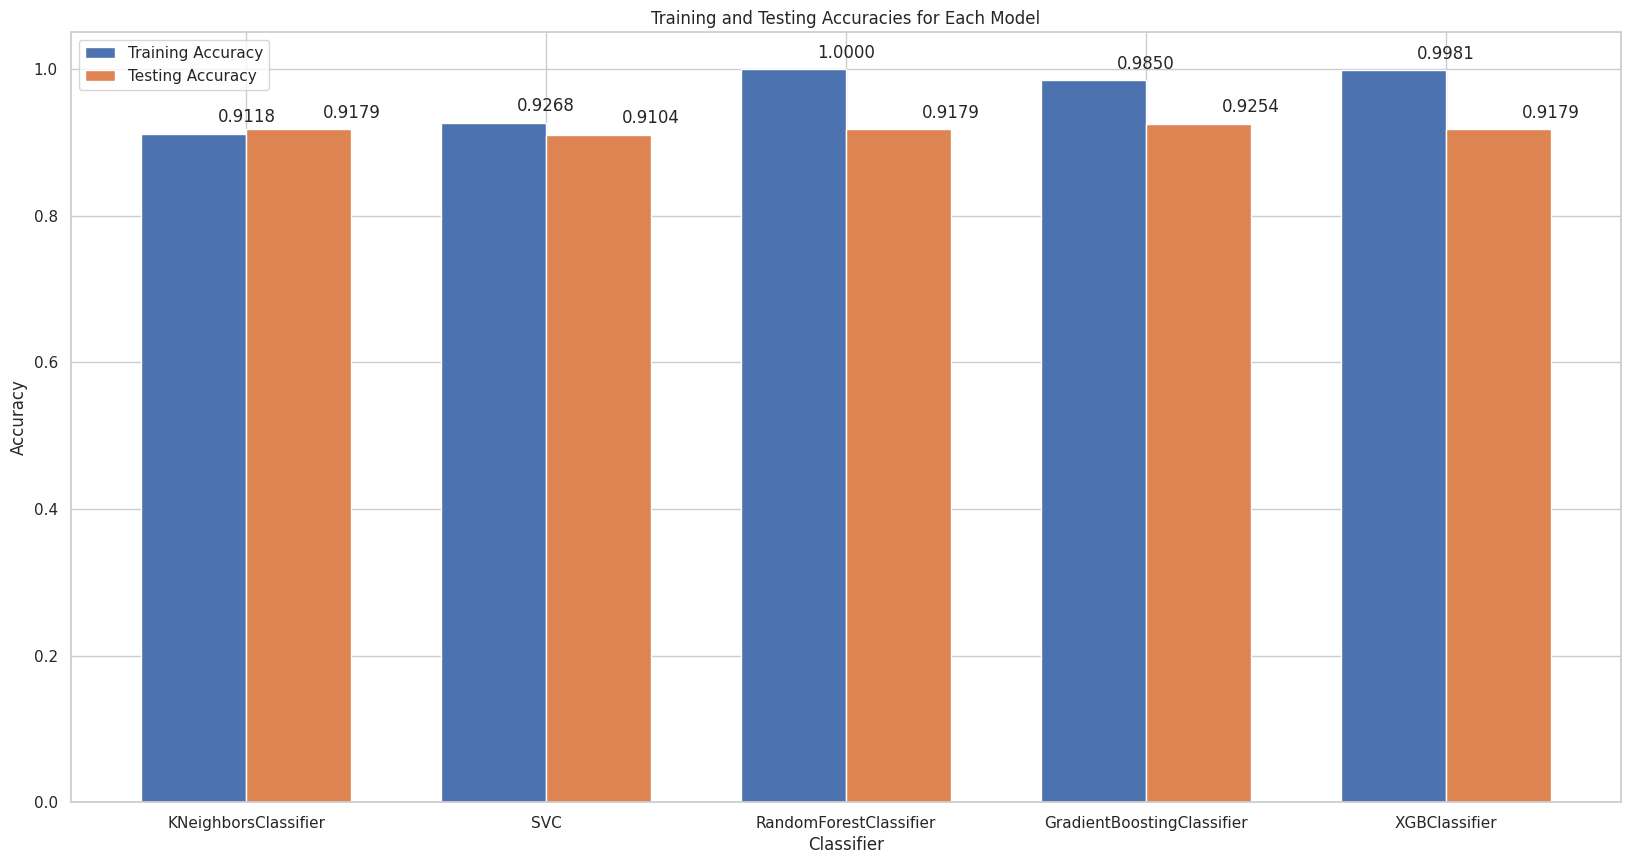

In [156]:
bar_width = 0.35
plt.figure(figsize=(20, 10))
bar_positions_train = np.arange(len(classifiers))
bar_positions_test = bar_positions_train + bar_width

plt.bar(bar_positions_train, train_accuracies, width=bar_width, label='Training Accuracy')
plt.bar(bar_positions_test, test_accuracies, width=bar_width, label='Testing Accuracy')

# Add labels to the bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(bar_positions_train[i] + bar_width / 2, train_acc + 0.01, f'{train_acc:.4f}', ha='center', va='bottom')
    plt.text(bar_positions_test[i] + bar_width / 2, test_acc + 0.01, f'{test_acc:.4f}', ha='center', va='bottom')

plt.title('Training and Testing Accuracies for Each Model')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(bar_positions_train + bar_width / 2, classifiers.keys())
plt.legend()
plt.show()

`Accuracy` represents the overall scoring of the model on the test set.

`Precision` by its definition it represents how many true positive classification the model scored over the total positive classifications (in my case how many true Termination) this score is actually very important cause I do not want to terminate workers who supposedly should not be terminated.

`Recall` by its definition it represents how many true positive classification the model scored over the total classification that should be terminated (The true and the negative classification) this score is important cause it shows me the percentage of how this model can capture the workers that should be terminated.

`F1_Score` it integrates both precision and recall scores in its calculation to give me better insight about my model performance.